<a href="https://colab.research.google.com/github/Shravani-std/Deep-Learning/blob/main/Feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

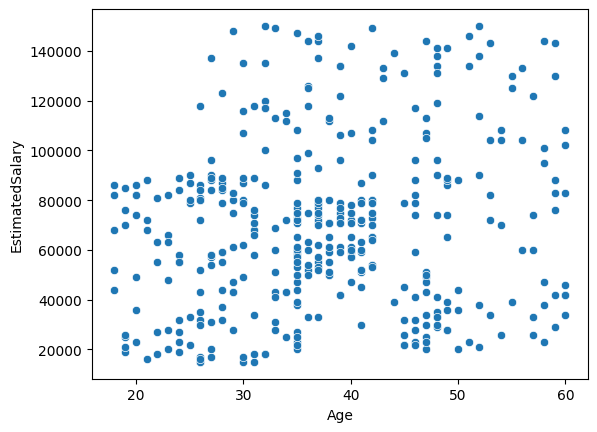

In [6]:
sns.scatterplot(x=df.iloc[:,2], y=df.iloc[:,3])

In [31]:
X = df.drop( ['User ID', 'Gender', 'Purchased'] , axis=1)

y = df.iloc[:, -1]

In [32]:
X.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [33]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)


In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [36]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='relu'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
history = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3753 - loss: 9.9594 - val_accuracy: 0.3500 - val_loss: 10.3626
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3798 - loss: 9.8875 - val_accuracy: 0.3500 - val_loss: 10.3626
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3374 - loss: 10.5629 - val_accuracy: 0.3500 - val_loss: 10.3626
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3860 - loss: 9.7884 - val_accuracy: 0.3500 - val_loss: 10.3626
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3466 - loss: 10.4165 - val_accuracy: 0.3500 - val_loss: 10.3626
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3458 - loss: 10.4301 - val_accuracy: 0.3500 - val_loss: 10.3626
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3477 - loss: 10.3998 - val_accuracy: 0.3500 - val_loss: 10.3626
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3586 - loss: 10.2247 - val_acc

See the validation_Accuracy is same

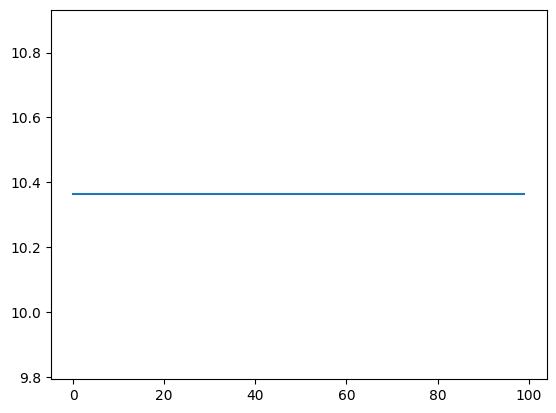

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X_train_scaled

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

<Axes: >

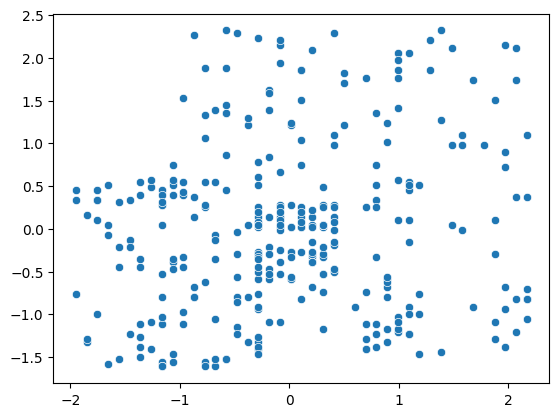

In [51]:
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1])

In [52]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim = 2))
model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [56]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6540 - loss: 1.8431 - val_accuracy: 0.6500 - val_loss: 0.6638
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6400 - loss: 0.6036 - val_accuracy: 0.6875 - val_loss: 0.4571
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7145 - loss: 0.4469 - val_accuracy: 0.7500 - val_loss: 0.3697
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7377 - loss: 0.4105 - val_accuracy: 0.8000 - val_loss: 0.3191
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7854 - loss: 0.3754 - val_accuracy: 0.8500 - val_loss: 0.2845
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8163 - loss: 0.3309 - val_accuracy: 0.9000 - val_loss: 0.2596
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8497 - loss: 0.3373 - val_accuracy: 0.9125 - val_loss: 0.2408
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8824 - loss: 0.2777 - val_accuracy: 0.91

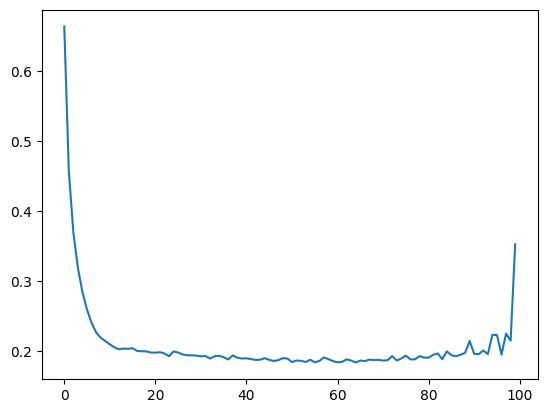

In [57]:
plt.plot(history.history['val_loss'])